<a href="https://colab.research.google.com/github/b91303046/2nd-ML100Days/blob/master/homework/Day077_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [0]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [0]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

W0712 07:31:41.301930 140519792899968 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0712 07:31:41.326821 140519792899968 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0712 07:31:41.332383 140519792899968 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
"""
Compile 模型
"""
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0712 07:32:03.962574 140519792899968 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0712 07:32:03.993278 140519792899968 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0712 07:32:06.180497 140519792899968 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0712 07:32:06.308836 140519792899968 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 27s 544us/step - loss: 1.9248 - acc: 0.3034 - val_loss: 1.7542 - val_acc: 0.3654
Epoch 2/500
50000/50000 [==============================] - 26s 517us/step - loss: 1.7085 - acc: 0.3898 - val_loss: 1.6623 - val_acc: 0.3954
Epoch 3/500
50000/50000 [==============================] - 26s 518us/step - loss: 1.6181 - acc: 0.4201 - val_loss: 1.5723 - val_acc: 0.4428
Epoch 4/500
50000/50000 [==============================] - 26s 517us/step - loss: 1.5387 - acc: 0.4520 - val_loss: 1.5378 - val_acc: 0.4506
Epoch 5/500
50000/50000 [==============================] - 26s 521us/step - loss: 1.5016 - acc: 0.4661 - val_loss: 1.5901 - val_acc: 0.4415
Epoch 6/500
50000/50000 [==============================] - 26s 524us/step - loss: 1.4640 - acc: 0.4788 - val_loss: 1.4803 - val_acc: 0.4732
Epoch 7/500
50000/50000 [==============================] - 26s 526us/step - loss: 1.4358 - acc: 0.4902 - val_l

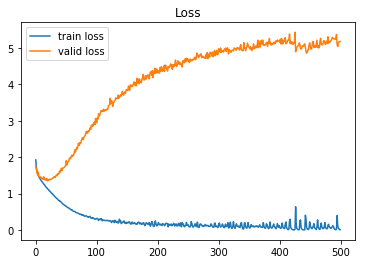

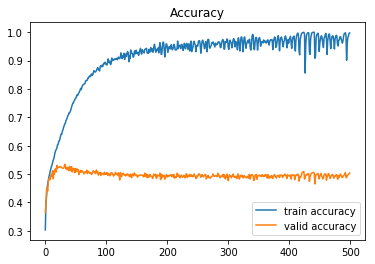

In [7]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [8]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 11s 218us/step - loss: 2.2781 - acc: 0.1353 - val_loss: 2.2339 - val_acc: 0.1816
Epoch 2/100
50000/50000 [==============================] - 11s 219us/step - loss: 2.2068 - acc: 0.2015 - val_loss: 2.1792 - val_acc: 0.2262
Epoch 3/100
50000/50000 [==============================] - 11s 220us/step - loss: 2.1547 - acc: 0.2390 - val_loss: 2.1311 - val_acc: 0.2473
Epoch 4/100
50000/50000 [==============================] - 11s 221us/step - loss: 2.1095 - acc: 0.2577 - val_loss: 2.0898 - val_acc: 0.2654
Epoch 5/100
50000/50000 [==============================] - 11s 221us/step - loss: 2.0708 - acc: 0.2737 - val_loss: 2.0542 - val_acc: 0.2732
Epoch 6/100
50000/50000 [==============================] - 11s 221us/step - loss: 2.0375 - acc: 0.2837 - val_loss: 2.0225 - val_acc: 0.2873
Epoch 7/100
50000/50000 [==============================] - 11s 219us/step - loss: 2.0079 - acc: 0.2972 - val_l

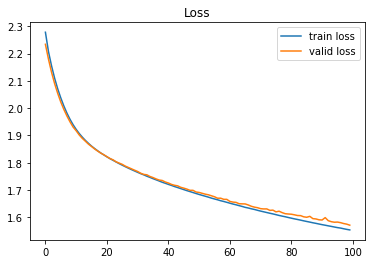

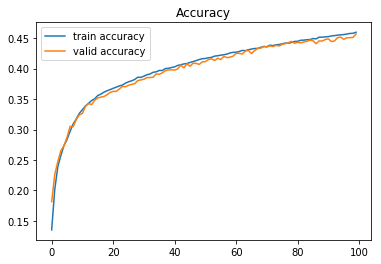

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()